# Case Study on Probability for Data Science

In [620]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [621]:
df=pd.read_csv("mushrooms.csv")

In [622]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [623]:
df.shape

(8124, 23)

In [624]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [626]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [627]:
#Unique values in columns
for i in df.columns:
    print(i,":",pd.unique(df[i]))

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [628]:
#Handling Categorical features
df['class']=df['class'].replace(['p','e'],[0,1])
df['cap-shape']=df['cap-shape'].replace(['x','b','s','f','k','c'],[0,1,2,3,4,5])
df['cap-surface']=df['cap-surface'].replace(['s', 'y', 'f', 'g'],[0,1,2,3])
df['cap-color']=df['cap-color'].replace(['n','y','w','g','e','p','b','u','c','r'],[0,1,2,3,4,5,6,7,8,9])
df['bruises']=df['bruises'].replace(['t','f'],[0,1])
df['odor']=df['odor'].replace(['p','a','l','n','f','c','y','s','m'],[0,1,2,3,4,5,6,7,8])
df['gill-attachment']=df['gill-attachment'].replace(['f','a'],[0,1])
df['gill-spacing']=df['gill-spacing'].replace(['c','w'],[0,1])
df['gill-size']=df['gill-size'].replace(['n','b'],[0,1])
df['gill-color']=df['gill-color'].replace(['k','n','g','p','w','h','u','e','b','r','y','o'],[0,1,2,3,4,5,6,7,8,9,10,11])
df['stalk-shape']=df['stalk-shape'].replace(['e','t'],[0,1])
df['stalk-root']=df['stalk-root'].replace(['e','c','b','r','?'],[0,1,2,3,4])
df['stalk-surface-above-ring']=df['stalk-surface-above-ring'].replace(['s','f','k','y'],[0,1,2,3])
df['stalk-surface-below-ring']=df['stalk-surface-below-ring'].replace(['s','f','y','k'],[0,1,2,3])
df['stalk-color-above-ring']=df['stalk-color-above-ring'].replace(['w','g','p','n','b','e','o','c','y'],[0,1,2,3,4,5,6,7,8])
df['stalk-color-below-ring']=df['stalk-color-below-ring'].replace(['w','p','g','b','n','e','y','o','c'],[0,1,2,3,4,5,6,7,8])
df['veil-type']=df['veil-type'].replace(['p'],[0])
df['veil-color']=df['veil-color'].replace(['w','n','o','y'],[0,1,2,3])
df['ring-number']=df['ring-number'].replace(['o','t','n'],[0,1,2])
df['ring-type']=df['ring-type'].replace(['p','e','l','f','n'],[0,1,2,3,4])
df['spore-print-color']=df['spore-print-color'].replace(['k','n','u','h','w','r','o','y','b'],[0,1,2,3,4,5,6,7,8])
df['population']=df['population'].replace(['s','n','a','v','y','c'],[0,1,2,3,4,5])
df['habitat']=df['habitat'].replace(['u','g','m','d','p','w','l'],[0,1,2,3,4,5,6])

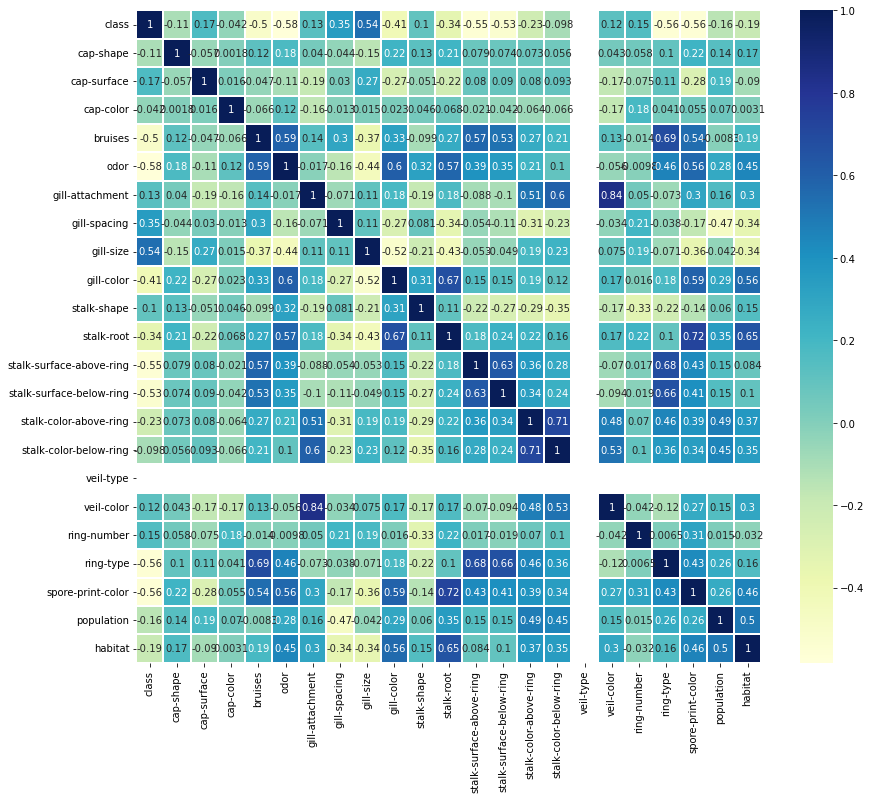

In [629]:
#plotting heatmap
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.show()

In [630]:
#only 1 value for veil-type. so we can drop it
#veil-color,ring-type, stalk-root,stalk-color-below-ring,stalk-surface-above-ring,stalk-surface-below-ring have high correlation so drop it
df.drop(columns=['veil-type','veil-color','ring-type','stalk-root','stalk-color-below-ring','gill-attachment','stalk-surface-above-ring','stalk-surface-below-ring'],axis=1,inplace=True)

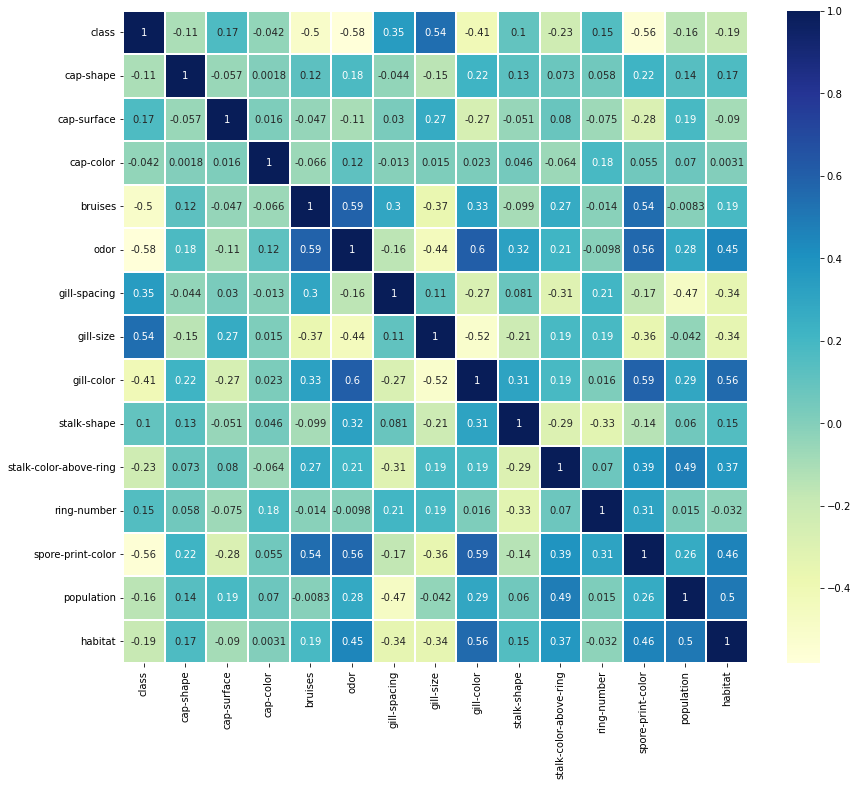

In [631]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.show()

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

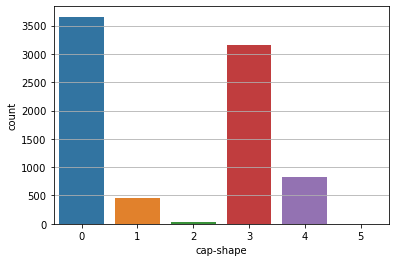

In [632]:
plt.grid()
sns.countplot(df['cap-shape'])

In [633]:
#cap-shape with value 2 and 5 are less in number so drop rows with those values. Otherwise it affects the model
index_names=[]
index_names = df[ df['cap-shape'] == 2].index
df.drop(index_names, inplace = True)
index_names1=[]
index_names1 = df[ df['cap-shape'] == 5].index
df.drop(index_names1, inplace = True)

<AxesSubplot:xlabel='cap-surface', ylabel='count'>

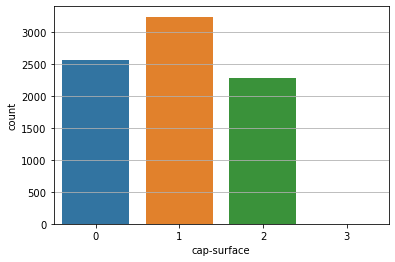

In [634]:
plt.grid()
sns.countplot(df['cap-surface'])

In [635]:
#cap-surface with value 3 is less in number so drop rows having that value. Otherwise it affects the model
index_names=[]
index_names = df[ df['cap-surface'] == 3].index
df.drop(index_names, inplace = True)

<AxesSubplot:xlabel='cap-color', ylabel='count'>

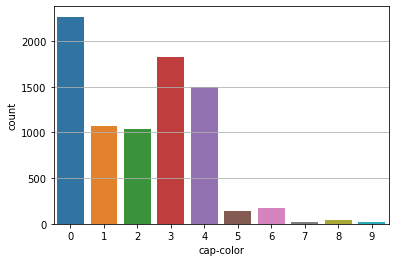

In [636]:
plt.grid()
sns.countplot(df['cap-color'])

In [637]:
#cap-color with value 5,6,7,8,9 are less in number so drop rows containing those values. Otherwise it affects the model
index_names=[]
index_names = df[ df['cap-color'] == 5].index
df.drop(index_names, inplace = True)
index_names1=[]
index_names1 = df[ df['cap-color'] == 6].index
df.drop(index_names1, inplace = True)
index_names2=[]
index_names2 = df[ df['cap-color'] == 7].index
df.drop(index_names2, inplace = True)
index_names3=[]
index_names3 = df[ df['cap-color'] == 8].index
df.drop(index_names3, inplace = True)
index_names4=[]
index_names4 = df[ df['cap-color'] == 9].index
df.drop(index_names4, inplace = True)

<AxesSubplot:xlabel='odor', ylabel='count'>

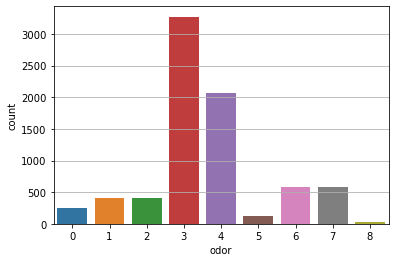

In [638]:
plt.grid()
sns.countplot(df['odor'])

In [639]:
#odor with value 5 and 8 are less in number so drop rows with those values. Otherwise it affects the model.
index_names=[]
index_names = df[ df['odor'] == 5].index
df.drop(index_names, inplace = True)
index_names1=[]
index_names1 = df[ df['odor'] == 8].index
df.drop(index_names1, inplace = True)

<AxesSubplot:xlabel='gill-color', ylabel='count'>

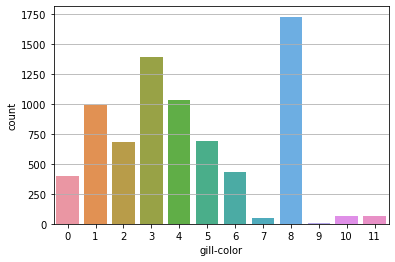

In [640]:
plt.grid()
sns.countplot(df['gill-color'])

In [641]:
#gill-color with value 7,9,10 and 11 are less in number so drop rows with those values. Otherwise it affects the model
index_names=[]
index_names = df[ df['gill-color'] == 7].index
df.drop(index_names, inplace = True)
index_names1=[]
index_names1 = df[ df['gill-color'] == 9].index
df.drop(index_names1, inplace = True)
index_names2=[]
index_names2 = df[ df['gill-color'] == 10].index
df.drop(index_names2, inplace = True)
index_names3=[]
index_names3 = df[ df['gill-color'] == 11].index
df.drop(index_names3, inplace = True)

<AxesSubplot:xlabel='stalk-color-above-ring', ylabel='count'>

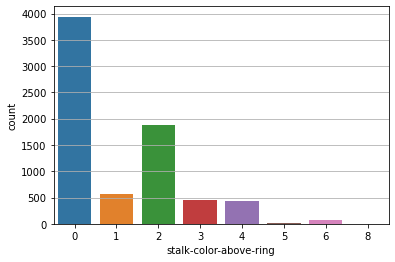

In [642]:
plt.grid()
sns.countplot(df['stalk-color-above-ring'])

In [643]:
#stalk-color-above-ring with value 5 and 6 are less in number so drop it. Otherwise it affects the model
index_names=[]
index_names = df[ df['stalk-color-above-ring'] == 5].index
df.drop(index_names, inplace = True)
index_names1=[]
index_names1 = df[ df['stalk-color-above-ring'] == 6].index
df.drop(index_names1, inplace = True)
index_names2=[]
index_names2= df[ df['stalk-color-above-ring'] == 8].index
df.drop(index_names2, inplace = True)

<AxesSubplot:xlabel='spore-print-color', ylabel='count'>

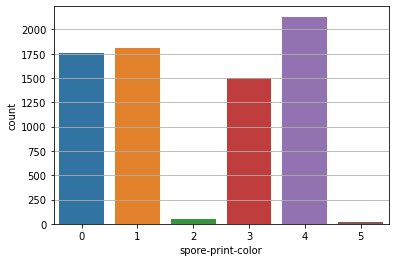

In [644]:
plt.grid()
sns.countplot(df['spore-print-color'])

In [645]:
#spore-print-color with value 2 and 5 are less in number so drop it. Otherwise it affects the model
index_names=[]
index_names = df[ df['spore-print-color'] == 2].index
df.drop(index_names, inplace = True)
index_names1=[]
index_names1 = df[ df['spore-print-color'] == 5].index
df.drop(index_names1, inplace = True)

<AxesSubplot:xlabel='population', ylabel='count'>

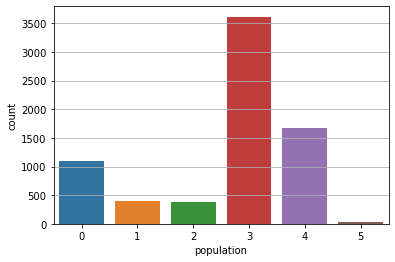

In [646]:
plt.grid()
sns.countplot(df['population'])

In [647]:
#population with value 5 is less in number so drop it. Otherwise it affects the model
index_names=[]
index_names = df[ df['population'] == 5].index
df.drop(index_names, inplace = True)

<AxesSubplot:xlabel='habitat', ylabel='count'>

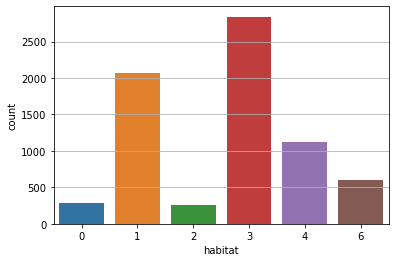

In [648]:
plt.grid()
sns.countplot(df['habitat'])

In [649]:
df.isna().sum()

class                     0
cap-shape                 0
cap-surface               0
cap-color                 0
bruises                   0
odor                      0
gill-spacing              0
gill-size                 0
gill-color                0
stalk-shape               0
stalk-color-above-ring    0
ring-number               0
spore-print-color         0
population                0
habitat                   0
dtype: int64

No missing values in the dataset

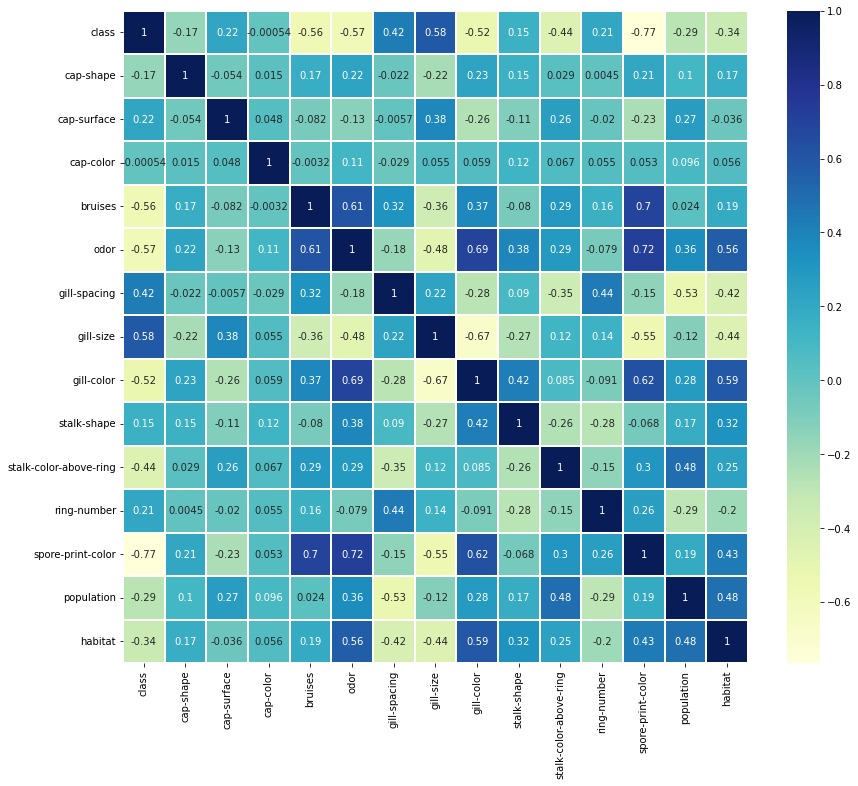

In [650]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.show()

In [651]:
df.shape

(7176, 15)

In [652]:
X=df.drop(['class',],axis=1)
y=df['class']

In [653]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-color-above-ring,ring-number,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,0,0,0,1,1,1
2,1,0,2,0,2,0,1,1,0,0,0,1,1,2
3,0,1,2,0,0,0,0,1,0,0,0,0,0,0
4,0,0,3,1,3,1,1,0,1,0,0,1,2,1


In [654]:
#Splitting into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [655]:
#Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [656]:
#initialising the classifiers
DTC = DecisionTreeClassifier(random_state=42)
GNB = GaussianNB()
lr = LogisticRegression()
RFC=RandomForestClassifier(n_estimators=100)
KNN = KNeighborsClassifier(n_neighbors=15)
SVM = SVC(random_state=42)

In [657]:
#Applying Logistical Regression
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
print("Measuring Efficiency of Logistic Regression\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred))
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'),"\n")

Measuring Efficiency of Logistic Regression

Confusion Matrix is :
 [[696   2]
 [  5 733]]
Accuracy is 0.995125348189415
Precision is 0.9950731219734684
Recall is 0.9951798013682143
F1 score is 0.9951221098185252 



In [658]:
#Applying Decision Tree Classifier
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
print("Measuring Efficiency of Decision Tree Classifier\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred))
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'),"\n")

Measuring Efficiency of Decision Tree Classifier

Confusion Matrix is :
 [[698   0]
 [  0 738]]
Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1 score is 1.0 



In [659]:
#Applying Random Forest Classifier Algorithm
RFC.fit(X_train, y_train)
y_pred=RFC.predict(X_test)
print("Measuring Efficiency of Random Forest Algorithm\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred))
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'),"\n")

Measuring Efficiency of Random Forest Algorithm

Confusion Matrix is :
 [[698   0]
 [  0 738]]
Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1 score is 1.0 



In [660]:
#Applying K Neaarest Neighbor 
KNN.fit(X_train, y_train)
y_pred=KNN.predict(X_test)
print("Measuring Efficiency of K Nearest Neighbor\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred))
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'),"\n")

Measuring Efficiency of K Nearest Neighbor

Confusion Matrix is :
 [[698   0]
 [ 11 727]]
Accuracy is 0.9923398328690808
Precision is 0.9922425952045134
Recall is 0.9925474254742548
F1 score is 0.9923367074913099 



In [661]:
#Applying Support Vector Machine Classifier
SVM.fit(X_train, y_train)
y_pred=SVM.predict(X_test)
print("Measuring Efficiency of Support Vector Machine\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred))
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'),"\n")

Measuring Efficiency of Support Vector Machine

Confusion Matrix is :
 [[698   0]
 [  0 738]]
Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1 score is 1.0 



In [662]:
#Applying Gaussian Naive Bayes
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
print("Measuring Efficiency of Gaussian Naive Bayes\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred))
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Measuring Efficiency of Gaussian Naive Bayes

Confusion Matrix is :
 [[698   0]
 [495 243]]
Accuracy is 0.6552924791086351
Precision is 0.7925398155909472
Recall is 0.6646341463414634
F1 score is 0.6168232913996283


In [663]:
#Applying Bernoulli Naive Bayes
BB = BernoulliNB()
BB.fit(X_train,y_train)
y_pred = BB.predict(X_test)
print("Measuring Efficiency of Bernoulli Naive Bayes\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred))
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Measuring Efficiency of Bernoulli Naive Bayes

Confusion Matrix is :
 [[665  33]
 [ 21 717]]
Accuracy is 0.9623955431754875
Precision is 0.9626938775510203
Recall is 0.9621333892422019
F1 score is 0.9623461681894462


In [664]:
#Applying Multinomial Naive Bayes
MB =MultinomialNB()
MB.fit(X_train,y_train)
y_pred = MB.predict(X_test)
print("Measuring Efficiency of Multinomial Naive Bayes\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred))
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Measuring Efficiency of Multinomial Naive Bayes

Confusion Matrix is :
 [[668  30]
 [ 17 721]]
Accuracy is 0.9672701949860725
Precision is 0.9676178720343678
Recall is 0.9669924134771434
F1 score is 0.9672255494256021
